In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
 inspector = inspect(engine)

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
 engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

/Users/hannahcamilleri/opt/anaconda3/envs/PythonData1/lib/python3.7/site-packages/ipykernel_launcher.py:1: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  """Entry point for launching an IPython kernel.


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [14]:
 engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first() 


('2017-08-23',)

2016-08-23


Text(0.5, 1.0, 'Precipitation over the Past Year')

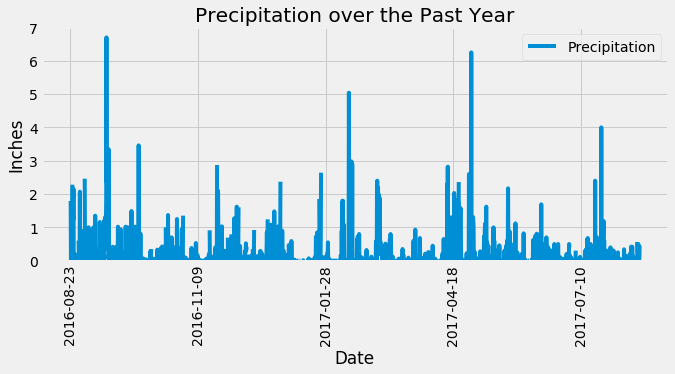

In [204]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data)

# Sort the dataframe by date
df = df.rename(columns = {0:'Date',1:'Precipitation'})
df = df.sort_values('Date')
#df = df.sort_values(by=Index,ascending=True)
df = df.set_index('Date')
df
# Use Pandas Plotting with Matplotlib to plot the data
fix,ax = plt.subplots(figsize = (10,4))
df.plot(kind='line',ylim=(0,7),rot = 90,ax=ax)
plt.figsize=(6,20)
plt.ylabel('Inches')
plt.title("Precipitation over the Past Year")


In [114]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean = df['Precipitation'].mean()
median = df['Precipitation'].median()
std = df['Precipitation'].std()
var = df['Precipitation'].var()
sem = df['Precipitation'].sem()
print(f"Mean = {mean}")
print(f"Median = {median}")
print(f"Standard Deviation = {std}")
print(f"Variance = {var}")
print(f"SEM = {sem}")

Mean = 0.17727857496288968
Median = 0.02
Standard Deviation = 0.4611895038877035
Variance = 0.2126957584961861
SEM = 0.01025879279145186


# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#session.query(func.count(Measurement.station)).group_by(Measurement.station).all()

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
#func.count(Measurement.station)).\

In [129]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
highest = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
lowest = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f"Highest = {highest}")
print(f"Lowest = {lowest}")
print(f"Average = {avg}")

Highest = [(85.0,)]
Lowest = [(54.0,)]
Average = [(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

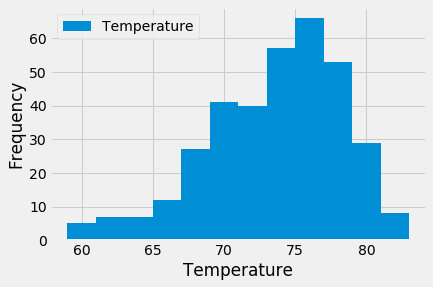

In [158]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data2 = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == 'USC00519281').all()
df2 = pd.DataFrame(data2)
df2 = df2.rename(columns = {0:'Date',1:'Temperature'})
df2 = df2.sort_values(by='Date',ascending=True)
df2 = df2.set_index('Date')

df2.plot(kind='hist',bins=12)
plt.xlabel('Temperature')

# Close session

In [205]:
# Close Session
session.close()